In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [64]:
#reading the data
df2 = pd.read_excel('Data - Psychographic responses.xlsx', header=0)# index_col=0, )
df  = pd.read_excel('Data - Psychographic responses.xlsx', header=0)# index_col=0, )

In [4]:
df.head(10)

,Timestamp,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",...,Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,Roll Number,Institute,Unnamed: 30
0,2019-02-26 20:56:44.911,2,8,5,8,1,0,10,9,7,...,Never,Online,Retail Stores,24-28,Female,Student,Other towns in East,NaN,NaN,NaN
1,2019-02-26 20:57:24.058,5,10,5,7,10,6,10,4,10,...,Never,Online,Retail Stores,24-28,Male,Student,Delhi,NaN,NaN,NaN
2,2019-02-26 20:57:24.574,3,8,7,8,5,3,5,0,9,...,Less Often,Online,Online,24-28,Male,Student,Kolkata,NaN,NaN,NaN
3,2019-02-26 20:57:41.066,9,10,8,5,9,7,0,4,10,...,Never,Online,Online,18-23,Male,Student,Other towns in North,NaN,NaN,NaN
4,2019-02-26 20:57:46.314,7,8,4,5,10,1,5,4,7,...,Never,Online,Online,24-28,Male,Student,Other towns in East,NaN,NaN,NaN
5,2019-02-26 20:57:49.461,2,7,5,8,10,4,10,2,7,...,Less Often,Online,Online,24-28,Male,Student,Other towns in East,NaN,NaN,NaN
6,2019-02-26 20:57:49.769,4,9,9,6,4,3,9,10,5,...,Less Often,Online,Retail Stores,24-28,Male,Student,Bangalore,NaN,NaN,NaN
7,2019-02-26 20:57:54.700,7,5,3,2,1,0,3,6,5,...,Everyday,Online,Retail Stores,18-23,Female,Student,Mumbai,NaN,NaN,NaN
8,2019-02-26 20:58:00.620,5,9,3,3,10,1,8,5,2,...,Less Often,Online,Retail Stores,24-28,Male,Student,Mumbai,NaN,NaN,NaN
9,2019-02-26 20:58:05.257,6,6,5,6,6,3,1,5,5,...,Never,Online,Retail Stores,24-28,Male,Student,Other towns in West,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 31 columns):
 #   Column                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                          --------------  -----         
 0   Timestamp                                                                                                       883 non-null    datetime64[ns]
 1   I generally plan my expenses and never spend more than my budget                                                883 non-null    int64         
 2   I often take opinions or check reviews before buying                                                            883 non-null    int64         
 3   I often experiment with new brands rather than just sticking to old ones                                        883 non-null    int64         
 4   I 

In [6]:
#df.columns = df.columns.str.replace(' ', '')
#df = df.rename(columns=lambda x: x.strip())
df.columns = df.columns.str.rstrip()
#df.columns = df.columns.str.replace(' +$', ' ')
df.columns

Index(['Timestamp',
       'I generally plan my expenses and never spend more than my budget',
       'I often take opinions or check reviews before buying',
       'I often experiment with new brands rather than just sticking to old ones',
       'I like to spend my weekends with friends than staying at home .',
       'My favorite subjects in school were Mathematics & Science rather than Literature',
       'I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday',
       'When I go out for shopping, I end up buying more items just by impulse',
       'I am active on almost all Social media',
       'I like light, sober colors to bright, exciting colors when it comes to clothing',
       'I prefer watching videos/shows online rather than watching them in the television',
       'I prefer ordering in from online apps than dining out',
       'I follow Brands, celebrities, influencers on social media',
       'I always try to keep up with new fash

In [57]:
df['Occupation'].value_counts()

Student                   822
Working Executive          57
Self Employed/business      3
Others                      1
Name: Occupation, dtype: int64

In [7]:
df['Roll Number']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
878    C21006
879    C21005
880    C21012
881    C21014
882    C21010
Name: Roll Number, Length: 883, dtype: object

In [8]:
df.drop(['Institute', 'Timestamp', 'Unnamed: 30', 'Roll Number'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 27 columns):
 #   Column                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                          --------------  ----- 
 0   I generally plan my expenses and never spend more than my budget                                                883 non-null    int64 
 1   I often take opinions or check reviews before buying                                                            883 non-null    int64 
 2   I often experiment with new brands rather than just sticking to old ones                                        883 non-null    int64 
 3   I like to spend my weekends with friends than staying at home .                                                 883 non-null    int64 
 4   My favorite subjects in school were Mathematics & 

In [10]:
df.iloc[:,14:27] = df.iloc[:,14:27]. apply(lambda x: x. astype('category'))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 27 columns):
 #   Column                                                                                                          Non-Null Count  Dtype   
---  ------                                                                                                          --------------  -----   
 0   I generally plan my expenses and never spend more than my budget                                                883 non-null    int64   
 1   I often take opinions or check reviews before buying                                                            883 non-null    int64   
 2   I often experiment with new brands rather than just sticking to old ones                                        883 non-null    int64   
 3   I like to spend my weekends with friends than staying at home .                                                 883 non-null    int64   
 4   My favorite subjects in school were Ma

In [12]:
df_1to14 = df.iloc[:,0:14]


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(df_1to14)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
df_1to14["cluster_id"] = kmeans.labels_
df_1to14.head(10)   

,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",I prefer watching videos/shows online rather than watching them in the television,I prefer ordering in from online apps than dining out,"I follow Brands, celebrities, influencers on social media",I always try to keep up with new fashion trends,I prefer reading or listening to music rather than exercising or playing a sport,cluster_id
0,2,8,5,8,1,0,10,9,7,10,5,7,0,10,2
1,5,10,5,7,10,6,10,4,10,10,5,0,0,5,0
2,3,8,7,8,5,3,5,0,9,8,1,6,4,7,2
3,9,10,8,5,9,7,0,4,10,10,8,6,7,3,1
4,7,8,4,5,10,1,5,4,7,8,3,3,0,8,0
5,2,7,5,8,10,4,10,2,7,9,9,4,10,8,2
6,4,9,9,6,4,3,9,10,5,5,5,7,4,9,2
7,7,5,3,2,1,0,3,6,5,7,2,1,8,9,2
8,5,9,3,3,10,1,8,5,2,7,8,2,5,8,2
9,6,6,5,6,6,3,1,5,5,5,5,2,5,5,0


In [15]:
df_1to14["cluster_id"].value_counts()

1    351
0    281
2    251
Name: cluster_id, dtype: int64

In [21]:
df_1to14["cluster_id"].value_counts()/len(df_1to14["cluster_id"])*100

1    39.750849
0    31.823330
2    28.425821
Name: cluster_id, dtype: float64

In [22]:
df_tabular = df_1to14.groupby("cluster_id").mean()
df_tabular = df_tabular.reset_index()
df_tabular.columns.name ='Questions'
df_tabular

Questions,cluster_id,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",I prefer watching videos/shows online rather than watching them in the television,I prefer ordering in from online apps than dining out,"I follow Brands, celebrities, influencers on social media",I always try to keep up with new fashion trends,I prefer reading or listening to music rather than exercising or playing a sport
0,0,6.683274,8.014235,5.459075,5.309609,7.466192,5.790036,3.740214,3.174377,6.177936,7.270463,4.370107,2.427046,3.626335,4.690391
1,1,6.555556,8.313390,6.626781,7.481481,8.219373,6.925926,6.549858,7.156695,6.874644,8.230769,5.327635,6.336182,7.037037,4.532764
2,2,4.442231,7.876494,5.804781,5.669323,5.266932,2.900398,6.840637,5.521912,6.721116,7.876494,5.326693,5.776892,5.505976,7.235060


In [23]:
df_tabular_Transpose = df_tabular.T
#df_tabular_Transpose.columns.name = 'cluster_id'
df_tabular_Transpose[1:]


,0,1,2
Questions,,,
I generally plan my expenses and never spend more than my budget,6.683274,6.555556,4.442231
I often take opinions or check reviews before buying,8.014235,8.313390,7.876494
I often experiment with new brands rather than just sticking to old ones,5.459075,6.626781,5.804781
I like to spend my weekends with friends than staying at home .,5.309609,7.481481,5.669323
My favorite subjects in school were Mathematics & Science rather than Literature,7.466192,8.219373,5.266932
"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday",5.790036,6.925926,2.900398
"When I go out for shopping, I end up buying more items just by impulse",3.740214,6.549858,6.840637
I am active on almost all Social media,3.174377,7.156695,5.521912
"I like light, sober colors to bright, exciting colors when it comes to clothing",6.177936,6.874644,6.721116


In [24]:
df_tabular_Transpose =  df_tabular_Transpose.apply(lambda x: x-x.mean())
df_tabular_Transpose

,0,1,2
Questions,,,
cluster_id,-4.946619,-5.477873,-3.650996
I generally plan my expenses and never spend more than my budget,1.736655,0.077683,-1.208765
I often take opinions or check reviews before buying,3.067616,1.835518,2.225498
I often experiment with new brands rather than just sticking to old ones,0.512456,0.148908,0.153785
I like to spend my weekends with friends than staying at home .,0.362989,1.003609,0.018327
My favorite subjects in school were Mathematics & Science rather than Literature,2.519573,1.741500,-0.384064
"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday",0.843416,0.448053,-2.750598
"When I go out for shopping, I end up buying more items just by impulse",-1.206406,0.071985,1.189641
I am active on almost all Social media,-1.772242,0.678822,-0.129084


In [25]:
df_tabular = df_tabular_Transpose.T
df_tabular = df_tabular.iloc[:,1:]
df_tabular =  df_tabular.apply(lambda x: x-x.mean())
df_tabular

Questions,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",I prefer watching videos/shows online rather than watching them in the television,I prefer ordering in from online apps than dining out,"I follow Brands, celebrities, influencers on social media",I always try to keep up with new fashion trends,I prefer reading or listening to music rather than exercising or playing a sport
0,1.534797,0.691405,0.240739,-0.098652,1.227236,1.329792,-1.224813,-1.364741,0.331914,0.223097,0.107172,-1.674451,-1.018238,-0.050470
1,-0.124175,-0.540693,-0.122808,0.541967,0.449164,0.934429,0.053578,1.086323,-0.502631,-0.347849,-0.466553,0.703432,0.861211,-1.739351
2,-1.410622,-0.150712,-0.117931,-0.443315,-1.676400,-2.264222,1.171235,0.278417,0.170717,0.124752,0.359381,0.971019,0.157027,1.789821


In [26]:
df_tabular_Transpose = df_tabular.T
df_tabular_Transpose

,0,1,2
Questions,,,
I generally plan my expenses and never spend more than my budget,1.534797,-0.124175,-1.410622
I often take opinions or check reviews before buying,0.691405,-0.540693,-0.150712
I often experiment with new brands rather than just sticking to old ones,0.240739,-0.122808,-0.117931
I like to spend my weekends with friends than staying at home .,-0.098652,0.541967,-0.443315
My favorite subjects in school were Mathematics & Science rather than Literature,1.227236,0.449164,-1.676400
"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday",1.329792,0.934429,-2.264222
"When I go out for shopping, I end up buying more items just by impulse",-1.224813,0.053578,1.171235
I am active on almost all Social media,-1.364741,1.086323,0.278417
"I like light, sober colors to bright, exciting colors when it comes to clothing",0.331914,-0.502631,0.170717


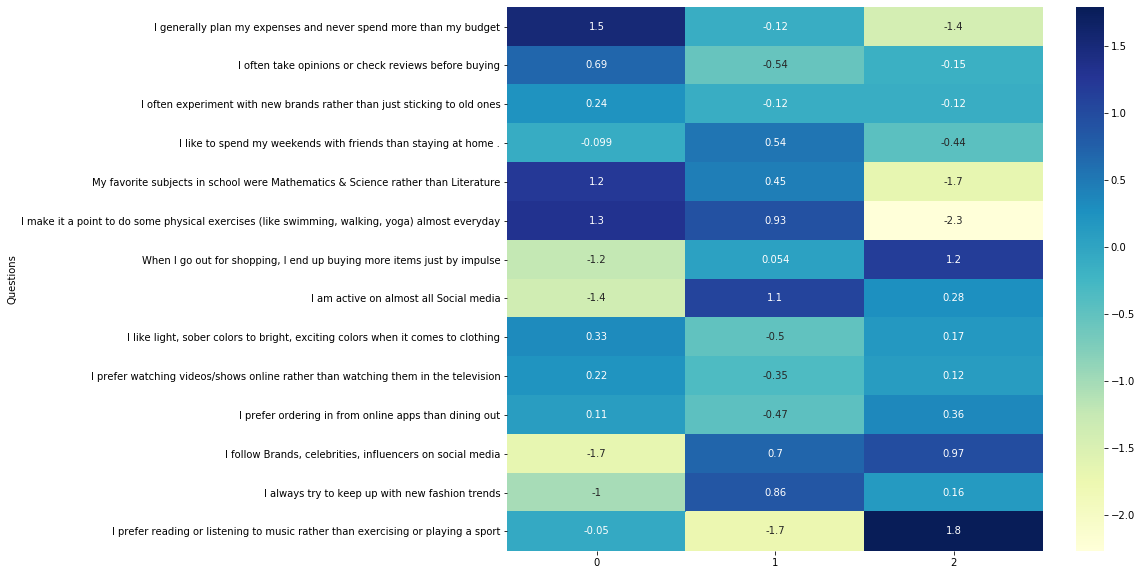

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(df_tabular_Transpose,  cmap="YlGnBu", annot=True)

Cluster 2: Home-bodies
Not into fitness, health consciousness
Literary, artistic, prefer pursuing these at home
Likes to splurge, while shopping
Follower of established brands and celebs
Prefer ordering online rather than going out

Cluster 0: Systematic and Health conscious
plan expenses, check reviews, inclined to maths, physical exercise daily,  not impulsive buyer
not acive on social media
not following brand/celebrity
not into fashion trends

Cluster1: Influencers
Social media buff, execise daily, keep up with fashion trends, follow brands/influencers, prefer sports than reading/music listening, hang out with friends, go out for dining instead of ordering online
Prefer to wear bright colours



In [28]:
df.iloc[:,14]

0      One Plus
1        Xiaomi
2       Samsung
3        Xiaomi
4        Xiaomi
         ...   
878    One Plus
879     Samsung
880      Xiaomi
881     Samsung
882     Samsung
Name: Which company's mobile phone do you use ?, Length: 883, dtype: category
Categories (7, object): ['Apple', 'One Plus', 'Oppo', 'Others', 'Samsung', 'Vivo', 'Xiaomi']

In [29]:
df["cluster_id"] = kmeans.labels_

In [60]:
df[860:]

,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",I prefer watching videos/shows online rather than watching them in the television,...,Given below is a list of products. Please tell us how frequently do you use these products [Hand sanitizers],Given below is a list of products. Please tell us how frequently do you use these products [Facewashes],Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,cluster_id
860,4,9,3,7,5,7,6,8,9,9,...,Everyday,Everyday,Less Often,Online,Retail Stores,29-33,Male,Working Executive,Other towns in North,2
861,8,10,7,4,8,2,2,3,8,8,...,Everyday,Less Often,Less Often,Online,Retail Stores,34-40,Male,Working Executive,Chennai,0
862,10,10,6,2,9,10,2,7,9,9,...,Everyday,Never,Never,Online,Online,34-40,Male,Working Executive,Other towns in East,1
863,5,9,9,5,9,5,2,3,5,9,...,Less Often,Never,Less Often,Online,Retail Stores,29-33,Male,Working Executive,Delhi,0
864,6,5,4,4,10,8,7,3,10,4,...,Everyday,Never,Never,Online,Retail Stores,29-33,Male,Working Executive,Other towns in South,0
865,0,5,2,10,10,10,10,8,9,9,...,Everyday,Never,Less Often,Online,Retail Stores,34-40,Male,Working Executive,Other towns in East,1
866,8,10,2,10,10,10,8,10,8,10,...,Less Often,Everyday,Less Often,Online,Retail Stores,24-28,Male,Working Executive,Delhi,1
867,3,5,8,10,3,0,9,6,7,9,...,Everyday,Less Often,Never,Newspaper,Retail Stores,29-33,Male,Working Executive,Kolkata,2
868,7,10,7,1,10,10,6,2,0,10,...,Everyday,Everyday,Less Often,Online,Retail Stores,24-28,Male,Student,Kolkata,0
869,9,9,5,5,7,5,3,8,7,9,...,Everyday,Everyday,Everyday,Online,Online,24-28,Male,Student,Other towns in North,0


In [125]:
df.groupby("Which company's mobile phone do you use ?")['cluster_id'].count()

Which company's mobile phone do you use ?
Apple       123
One Plus    181
Oppo         25
Others      173
Samsung     136
Vivo         23
Xiaomi      222
Name: cluster_id, dtype: int64

In [42]:
Cross_Initial = pd.crosstab(df.iloc[:,14],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,14],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Which company's mobile phone do you use ?,,,,
Apple,11.39,15.95,13.94,14.0
One Plus,18.51,23.08,19.12,20.0
Oppo,2.49,3.13,2.79,3.0
Others,24.56,16.24,18.73,20.0
Samsung,14.59,15.67,15.94,15.0
Vivo,2.85,1.42,3.98,3.0
Xiaomi,25.62,24.50,25.50,25.0


In [ ]:
'''
phone = round(ph.div(ph.sum(axis=1), axis=0),2)*100
phone
'''

In [31]:
'''

Cross['Cluster 0'] = round((Cross['Cluster 0']/Cross['All'])*100,2)
Cross['Cluster 1'] = round((Cross['Cluster 1']/Cross['All'])*100,2)
Cross['Cluster 2'] = round((Cross['Cluster 2']/Cross['All'])*100,2)
Cross
'''

"\n\nCross['Cluster 0'] = round((Cross['Cluster 0']/Cross['All'])*100,2)\nCross['Cluster 1'] = round((Cross['Cluster 1']/Cross['All'])*100,2)\nCross['Cluster 2'] = round((Cross['Cluster 2']/Cross['All'])*100,2)\nCross\n"

In [45]:
Cross_Initial = pd.crosstab(df.iloc[:,15],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,15],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
From where did you purchase your phone?,,,,
Online,74.02,74.36,66.93,72.0
Retail,25.27,24.22,30.68,26.0
Second hand mobile sources,0.71,1.42,2.39,1.0


In [46]:
Cross_Initial = pd.crosstab(df.iloc[:,16],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,16],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Which flavor of soft drink do you like to have the most ?,,,,
Cola,39.86,48.72,49.80,46.0
Fruit flavour,15.30,15.67,13.94,15.0
I do not consume soft drinks at all,22.78,13.39,13.15,16.0
Orange,8.19,11.68,11.55,11.0
White/Colourless,13.88,10.54,11.55,12.0


In [47]:
Cross_Initial = pd.crosstab(df.iloc[:,17],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,17],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Given below is a list of products. Please tell us how frequently do you use these products [Shower gels],,,,
Everyday,23.84,38.75,39.44,34.0
Less Often,31.67,37.04,33.07,34.0
Never,44.48,24.22,27.49,32.0


In [48]:
Cross_Initial = pd.crosstab(df.iloc[:,18],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,18],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Given below is a list of products. Please tell us how frequently do you use these products [Hand sanitizers],,,,
Everyday,45.55,49.0,40.64,46.0
Less Often,42.35,41.6,42.23,42.0
Never,12.10,9.4,17.13,12.0


In [49]:
Cross_Initial = pd.crosstab(df.iloc[:,19],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,19],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Given below is a list of products. Please tell us how frequently do you use these products [Facewashes],,,,
Everyday,58.72,78.92,74.50,71.0
Less Often,27.40,16.52,21.91,22.0
Never,13.88,4.56,3.59,7.0


In [50]:
Cross_Initial = pd.crosstab(df.iloc[:,20],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,20],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],,,,
Everyday,12.81,13.39,19.52,15.0
Less Often,51.25,66.67,58.57,59.0
Never,35.94,19.94,21.91,26.0


In [51]:
Cross_Initial = pd.crosstab(df.iloc[:,21],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,21],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
I generally read news from,,,,
Newspaper,17.08,13.96,6.37,13.0
Online,82.92,86.04,93.63,87.0


In [52]:
Cross_Initial = pd.crosstab(df.iloc[:,22],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,22],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
I generally prefer to buy clothes from,,,,
Online,26.33,29.91,31.87,29.0
Retail Stores,73.67,70.09,68.13,71.0


In [53]:
Cross_Initial = pd.crosstab(df.iloc[:,23],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,23],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Age,,,,
18-23,25.98,26.21,37.45,29.0
24-28,62.28,66.67,57.77,63.0
29-33,8.54,3.99,1.99,5.0
34-40,2.49,3.13,1.59,2.0
40-50,0.71,0.00,0.40,0.0
50-60,0.00,0.00,0.80,0.0


In [54]:
Cross_Initial = pd.crosstab(df.iloc[:,24],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,24],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Gender,,,,
Female,26.33,24.79,49.0,32.0
Male,73.67,75.21,51.0,68.0


In [55]:
Cross_Initial = pd.crosstab(df.iloc[:,25],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,25],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Occupation,,,,
Others,0.36,0.0,0.00,0.0
Self Employed/business,0.36,0.0,0.80,0.0
Student,90.39,94.3,94.42,93.0
Working Executive,8.90,5.7,4.78,6.0


In [58]:
Cross_Initial = pd.crosstab(df.iloc[:,26],df["cluster_id"])#.apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross=pd.crosstab(df.iloc[:,26],df["cluster_id"]).apply(lambda r: round((r/r.sum())*100,2), axis=0)
Cross['All'] =Cross_Initial.sum(axis=1)
Cross.columns =['Cluster 0', 'Cluster 1', 'Cluster 2', 'All']
X = Cross['All'].sum()
Cross['All'] =Cross['All'].apply(lambda x: round((x/X)*100),2)
Cross

,Cluster 0,Cluster 1,Cluster 2,All
Your hometown ?,,,,
Bangalore,1.07,0.28,1.20,1.0
Chennai,9.61,4.56,6.37,7.0
Delhi,9.61,9.97,10.36,10.0
Hyderabad,2.14,1.42,1.59,2.0
Kolkata,11.39,13.68,19.92,15.0
Mumbai,4.63,5.13,8.76,6.0
Other towns in East,11.74,16.24,11.95,14.0
Other towns in North,17.79,15.38,16.73,17.0
Other towns in South,14.95,16.24,12.75,15.0


In [67]:
from sklearn.metrics.pairwise import euclidean_distances

In [61]:
df.head()

,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",I prefer watching videos/shows online rather than watching them in the television,...,Given below is a list of products. Please tell us how frequently do you use these products [Hand sanitizers],Given below is a list of products. Please tell us how frequently do you use these products [Facewashes],Given below is a list of products. Please tell us how frequently do you use these products [Hair Conditioner],I generally read news from,I generally prefer to buy clothes from,Age,Gender,Occupation,Your hometown ?,cluster_id
0,2,8,5,8,1,0,10,9,7,10,...,Less Often,Everyday,Never,Online,Retail Stores,24-28,Female,Student,Other towns in East,2
1,5,10,5,7,10,6,10,4,10,10,...,Everyday,Everyday,Never,Online,Retail Stores,24-28,Male,Student,Delhi,0
2,3,8,7,8,5,3,5,0,9,8,...,Never,Everyday,Less Often,Online,Online,24-28,Male,Student,Kolkata,2
3,9,10,8,5,9,7,0,4,10,10,...,Less Often,Everyday,Never,Online,Online,18-23,Male,Student,Other towns in North,1
4,7,8,4,5,10,1,5,4,7,8,...,Less Often,Never,Never,Online,Online,24-28,Male,Student,Other towns in East,0


In [73]:
# Radha
df_R = df2[df2["Roll Number "] == "C21008"].iloc[:, 1:15]

In [74]:
df_G = df2[df2["Roll Number "] == "C21003"].iloc[:, 1:15]
df_k = df2[df2["Roll Number "] == "C21005"].iloc[:, 1:15]
df_Riya = df2[df2["Roll Number "] == "C21010"].iloc[:, 1:15]
df_S = df2[df2["Roll Number "] == "C21015"].iloc[:, 1:15]

In [75]:
euclidean_distances(df_tabular, df_k)  # so khushboo belongs to cluster 1

array([[25.96022447],
       [25.5703349 ],
       [26.65444714]])

In [76]:
euclidean_distances(df_tabular, df_Riya)  # so Riya belongs to cluster 0

array([[28.35084895],
       [28.45259879],
       [28.96400905]])

In [69]:
euclidean_distances(df_tabular, df_R)  # so Radha belongs to cluster 0

array([[24.61285623],
       [25.0326133 ],
       [24.77519755]])

In [70]:
euclidean_distances(df_tabular, df_G)  # so Geetha belongs to cluster 0

array([[24.78865232],
       [24.98099295],
       [26.35730528]])

In [71]:
df_tabular

Questions,I generally plan my expenses and never spend more than my budget,I often take opinions or check reviews before buying,I often experiment with new brands rather than just sticking to old ones,I like to spend my weekends with friends than staying at home .,My favorite subjects in school were Mathematics & Science rather than Literature,"I make it a point to do some physical exercises (like swimming, walking, yoga) almost everyday","When I go out for shopping, I end up buying more items just by impulse",I am active on almost all Social media,"I like light, sober colors to bright, exciting colors when it comes to clothing",I prefer watching videos/shows online rather than watching them in the television,I prefer ordering in from online apps than dining out,"I follow Brands, celebrities, influencers on social media",I always try to keep up with new fashion trends,I prefer reading or listening to music rather than exercising or playing a sport
0,1.534797,0.691405,0.240739,-0.098652,1.227236,1.329792,-1.224813,-1.364741,0.331914,0.223097,0.107172,-1.674451,-1.018238,-0.050470
1,-0.124175,-0.540693,-0.122808,0.541967,0.449164,0.934429,0.053578,1.086323,-0.502631,-0.347849,-0.466553,0.703432,0.861211,-1.739351
2,-1.410622,-0.150712,-0.117931,-0.443315,-1.676400,-2.264222,1.171235,0.278417,0.170717,0.124752,0.359381,0.971019,0.157027,1.789821
